In [1]:
import numpy as np

In [2]:
n = 30
X = np.random.uniform(-3, 5, size=n)

In [3]:
b = [45, -6, 1.2, -1, 0.1]
hata = np.random.normal(0, 4, size=n)

In [4]:
y = b[0] \
+ b[1] * X \
+ b[2] * X**2 \
+ b[3] * X**3 \
+ b[4] * X**4 + hata

In [5]:
import matplotlib.pyplot as plt

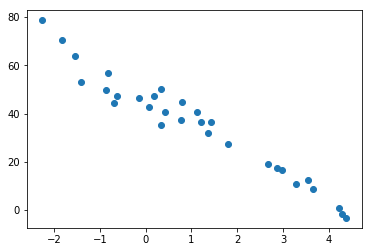

In [6]:
plt.scatter(X, y)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = X.reshape(n,1)
y = y.reshape(n,1)
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
regressor = DecisionTreeRegressor()

In [11]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [12]:
regressor.predict(X_train)

array([56.68681432, 18.98082329, 16.7837173 , 44.76241921, 52.95679357,
       27.54664252, 40.79070796, 47.10322549, 78.70508657,  8.56109048,
       12.62120022, 42.53802771, 37.349642  , 49.90055802, 47.14557969,
       36.54319025,  0.899988  , -1.79890341, 36.34788274, 17.63828045,
       50.37301164, 40.6656517 , 70.5262196 , 64.02690157])

In [13]:
y_train

array([[56.68681432],
       [18.98082329],
       [16.7837173 ],
       [44.76241921],
       [52.95679357],
       [27.54664252],
       [40.79070796],
       [47.10322549],
       [78.70508657],
       [ 8.56109048],
       [12.62120022],
       [42.53802771],
       [37.349642  ],
       [49.90055802],
       [47.14557969],
       [36.54319025],
       [ 0.899988  ],
       [-1.79890341],
       [36.34788274],
       [17.63828045],
       [50.37301164],
       [40.6656517 ],
       [70.5262196 ],
       [64.02690157]])

In [14]:
regressor.score(X_train,y_train)

1.0

In [15]:
regressor.score(X_test,y_test)

0.8623273900822073

In [16]:
x_range = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
y_range = regressor.predict(x_range)

In [17]:
y_hip = b[0] \
+ b[1] * x_range \
+ b[2] * x_range**2 \
+ b[3] * x_range**3 \
+ b[4] * x_range**4

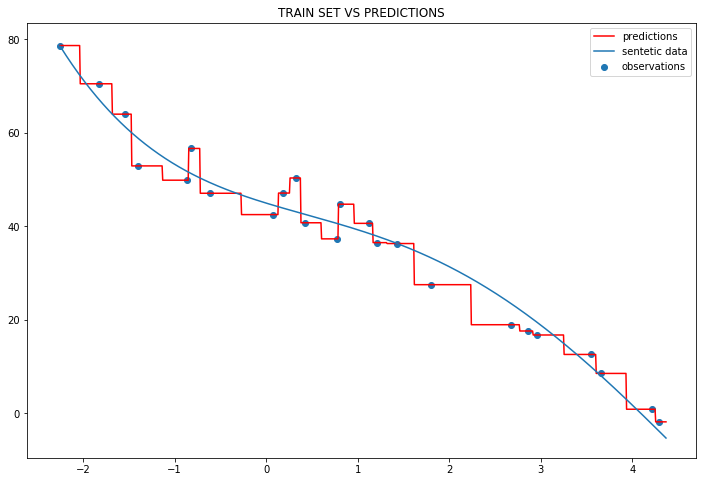

In [18]:
plt.figure(figsize=(12,8))
plt.plot(x_range, y_range, color="red", label="predictions")
plt.scatter(X_train, y_train, label="observations")
plt.plot(x_range, y_hip, label="sentetic data")
plt.title("TRAIN SET VS PREDICTIONS")
plt.legend()

Text(0.5, 1.0, 'TEST SET VS PREDICTIONS')

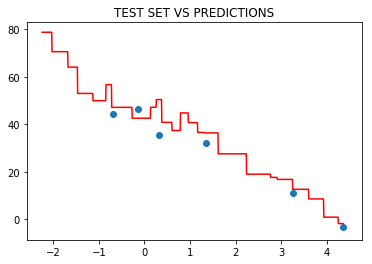

In [19]:
plt.plot(x_range, y_range, color="red")
plt.scatter(X_test, y_test)
plt.title("TEST SET VS PREDICTIONS")

In [20]:
depths = range(1,30)
train = []
test = []

In [21]:
for dep in depths:
    regressor = DecisionTreeRegressor(max_depth=dep)
    regressor.fit(X_train, y_train)
    train.append(regressor.score(X_train, y_train))
    test.append(regressor.score(X_test, y_test))

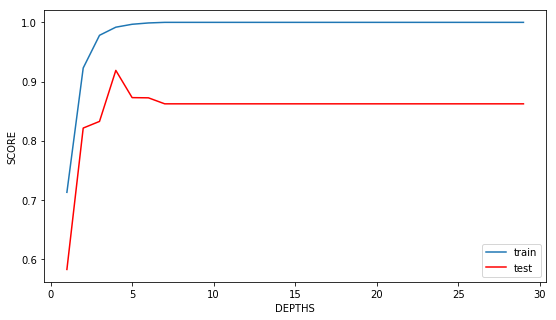

In [22]:
plt.figure(figsize=(9,5))
plt.plot(depths, train, label='train')
plt.plot(depths, test, color='red', label='test')
plt.xlabel('DEPTHS')
plt.ylabel('SCORE')
plt.legend()

In [23]:
test.index(max(test)) # we get the highest score at the max depth=4 because you know index begins from "0"

3